<a href="https://colab.research.google.com/github/Chandnahc/Projects/blob/main/Product_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

#Loading Datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#shape of dataset
x_train.shape,y_train.shape,"*************",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '*************', (10000, 28, 28), (10000,))

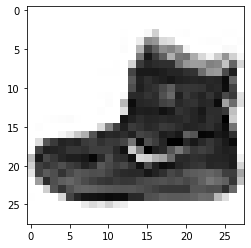

In [ ]:
plt.imshow(x_train[0],cmap="Greys")

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

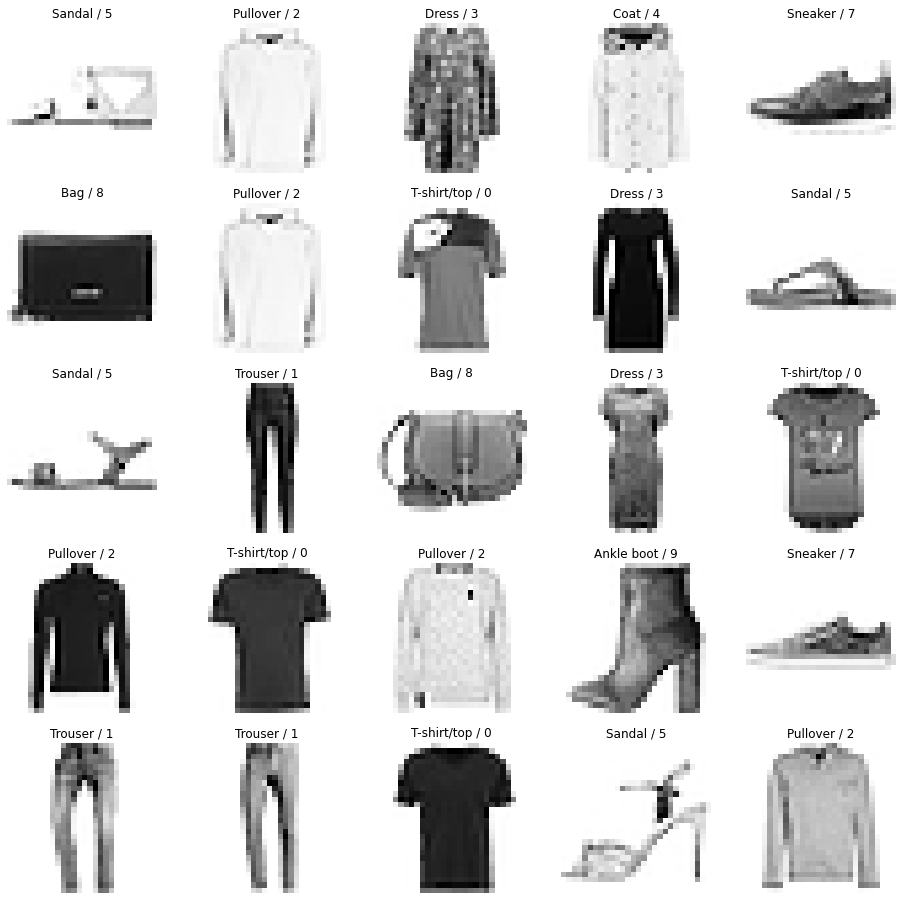

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(x_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train=np.expand_dims(x_train,-1)

In [ ]:
x_train.ndim

4

In [ ]:
x_test=np.expand_dims(x_test,-1)

In [ ]:
#feature scaling
x_train = x_train/255
x_test = x_test/255

In [ ]:
#spliting dataset
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation='relu',input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 31s 327ms/step - loss: 0.6359 - accuracy: 0.7853 - val_loss: 0.4210 - val_accuracy: 0.8543
Epoch 2/10
94/94 [==============================] - 22s 232ms/step - loss: 0.3849 - accuracy: 0.8654 - val_loss: 0.3770 - val_accuracy: 0.8711
Epoch 3/10
94/94 [==============================] - 19s 202ms/step - loss: 0.3416 - accuracy: 0.8803 - val_loss: 0.3387 - val_accuracy: 0.8844
Epoch 4/10
94/94 [==============================] - 19s 202ms/step - loss: 0.3097 - accuracy: 0.8922 - val_loss: 0.3405 - val_accuracy: 0.8829
Epoch 5/10
94/94 [==============================] - 19s 202ms/step - loss: 0.2899 - accuracy: 0.8986 - val_loss: 0.3084 - val_accuracy: 0.8912
Epoch 6/10
94/94 [==============================] - 20s 215ms/step - loss: 0.2751 - accuracy: 0.9033 - val_loss: 0.3003 - val_accuracy: 0.8957
Epoch 7/10
94/94 [==============================] - 19s 201ms/step - loss: 0.2581 - accuracy: 0.9084 - val_loss: 0.2927 - val_accuracy: 0.8970

In [ ]:
y_pred = model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.09, 0.07, 0.  ]], dtype=float32)

In [ ]:
print(y_pred)
y_test

[[3.4209952e-05 4.6062317e-07 1.0867418e-05 ... 7.6503083e-03
  8.8071718e-04 9.6999454e-01]
 [3.6216533e-04 1.5947670e-08 9.9645448e-01 ... 3.3628263e-11
  1.3665506e-06 6.1752142e-10]
 [4.0043610e-06 9.9999213e-01 1.3572356e-08 ... 2.3911368e-11
  1.4396142e-07 1.6079825e-09]
 ...
 [1.8383287e-03 5.3997888e-07 7.8149827e-04 ... 7.0243577e-06
  9.8111868e-01 2.0911732e-06]
 [3.7791540e-07 9.9996352e-01 9.4974313e-09 ... 2.0371663e-10
  1.1636379e-07 5.3931551e-08]
 [1.1009007e-03 8.7850516e-05 2.6155033e-03 ... 9.1368578e-02
  7.3805541e-02 4.5414455e-03]]


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2871 - accuracy: 0.8959


[0.2871257960796356, 0.8959000110626221]

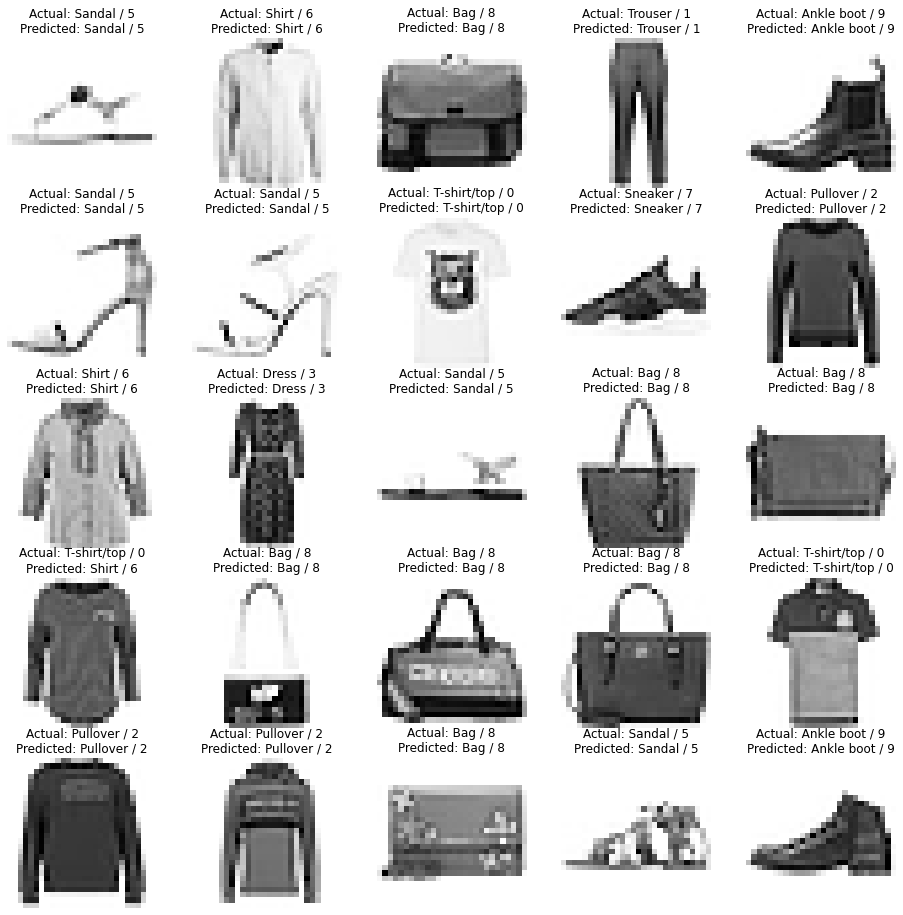

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual: {} / {}\nPredicted: {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

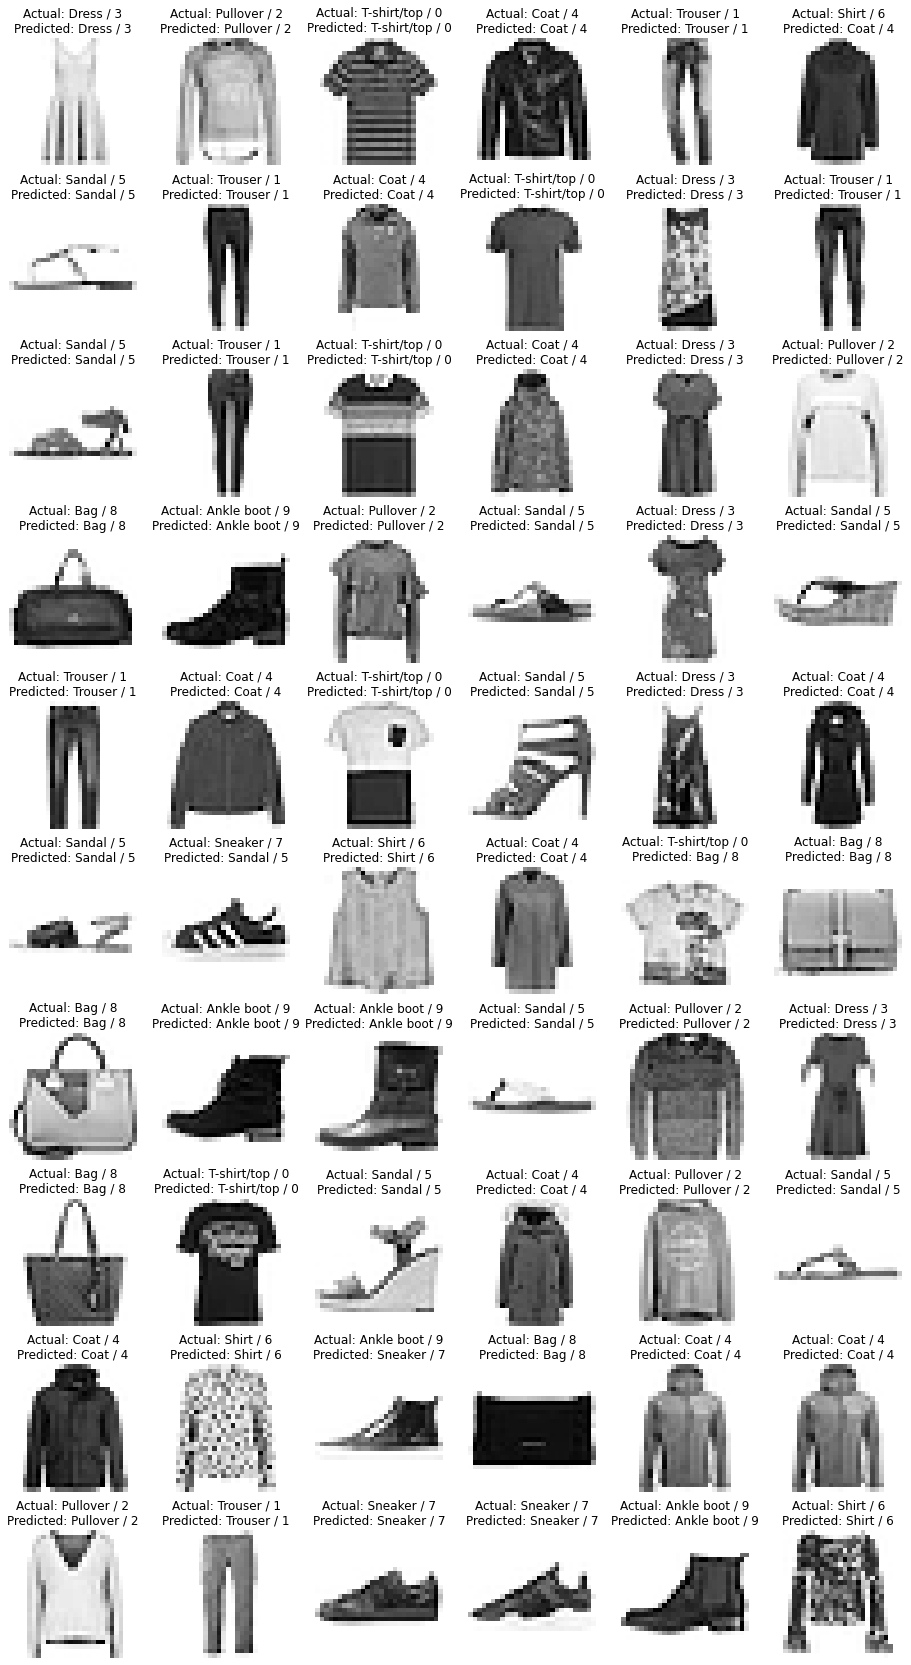

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual: {} / {}\nPredicted: {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.78      0.83      1000
       Dress       0.86      0.93      0.89      1000
        Coat       0.84      0.85      0.84      1000
      Sandal       0.95      0.99      0.97      1000
       Shirt       0.68      0.76      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



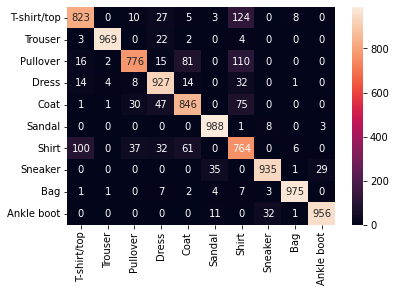

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

Saving the model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(x_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(x_validation, y_validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(x_test, y_test)

Epoch 1/20
94/94 [==============================] - 24s 255ms/step - loss: 1.0509 - accuracy: 0.6072 - val_loss: 0.5815 - val_accuracy: 0.7683
Epoch 2/20
94/94 [==============================] - 24s 253ms/step - loss: 0.5581 - accuracy: 0.7910 - val_loss: 0.4588 - val_accuracy: 0.8274
Epoch 3/20
94/94 [==============================] - 25s 267ms/step - loss: 0.4605 - accuracy: 0.8300 - val_loss: 0.3962 - val_accuracy: 0.8547
Epoch 4/20
94/94 [==============================] - 24s 255ms/step - loss: 0.4035 - accuracy: 0.8519 - val_loss: 0.3641 - val_accuracy: 0.8683
Epoch 5/20
94/94 [==============================] - 25s 262ms/step - loss: 0.3664 - accuracy: 0.8655 - val_loss: 0.3382 - val_accuracy: 0.8768
Epoch 6/20
94/94 [==============================] - 24s 257ms/step - loss: 0.3399 - accuracy: 0.8744 - val_loss: 0.3379 - val_accuracy: 0.8758
Epoch 7/20
94/94 [==============================] - 25s 263ms/step - loss: 0.3208 - accuracy: 0.8830 - val_loss: 0.3162 - val_accuracy: 0.8817

[0.5106205344200134, 0.8980000019073486]